In [1]:
# Brain MRI Classification using Custom CNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
# Paths
train_dir = "../data/classification/training"
test_dir  = "../data/classification/testing"

# Image parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2 # we split train data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Validation set
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Testing set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


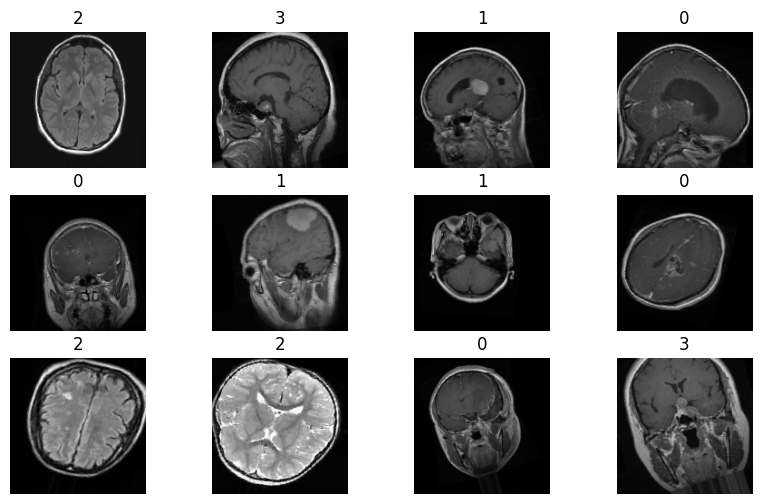

In [3]:
# Show some training samples
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))
    plt.axis("off")
plt.show()


In [4]:
# Custom CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')  # 4 classes: glioma, meningioma, notumor, pituitary
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,565,380 (36.49 MB)

 Trainable params: 9,564,932 (36.49 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.5303 - loss: 1.8818 - val_accuracy: 0.2550 - val_loss: 5.2748
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.5815 - loss: 1.0153 - val_accuracy: 0.3287 - val_loss: 2.3202
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.5981 - loss: 0.9094 - val_accuracy: 0.3699 - val_loss: 1.7689
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.6268 - loss: 0.8644 - val_accuracy: 0.5609 - val_loss: 1.2080
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.6377 - loss: 0.8337 - val_accuracy: 0.5933 - val_loss: 1.2129
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.6624 - loss: 0.7937 - val_accuracy: 0.4908 - val_loss: 1.1223
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.6808 - loss: 0.7548 - val_accuracy: 0.6486 - val_loss: 0.9627
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.6902 - loss: 0.7720 - val_accu

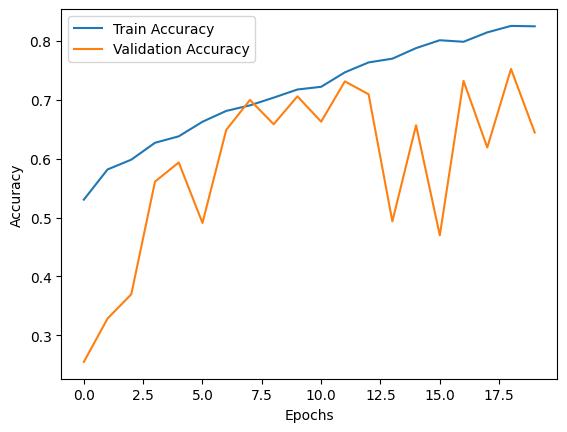

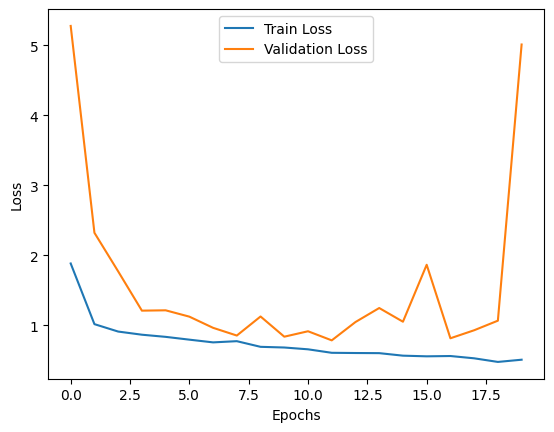

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 849ms/step - accuracy: 0.4035 - loss: 19.6568
Test Accuracy: 0.40


41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 519ms/step


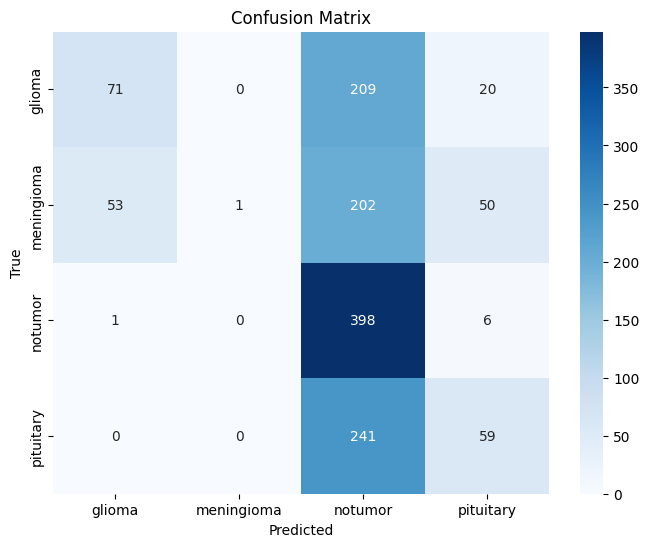

Classification Report:
              precision    recall  f1-score   support

      glioma       0.57      0.24      0.33       300
  meningioma       1.00      0.00      0.01       306
     notumor       0.38      0.98      0.55       405
   pituitary       0.44      0.20      0.27       300

    accuracy                           0.40      1311
   macro avg       0.60      0.35      0.29      1311
weighted avg       0.58      0.40      0.31      1311



In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Evaluate on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


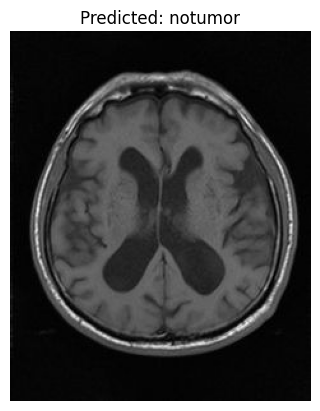

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


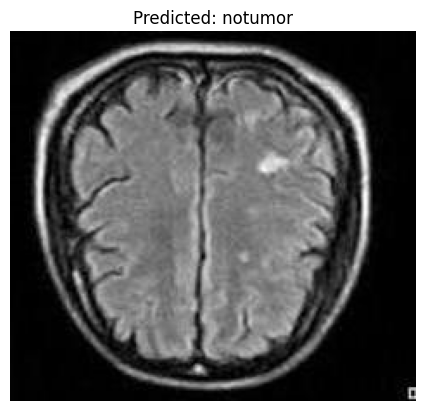

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


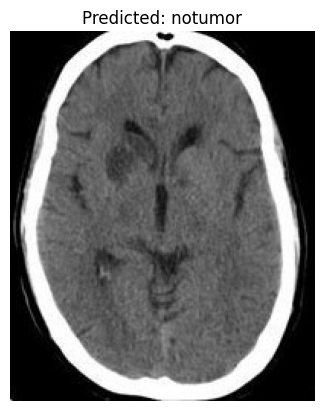

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


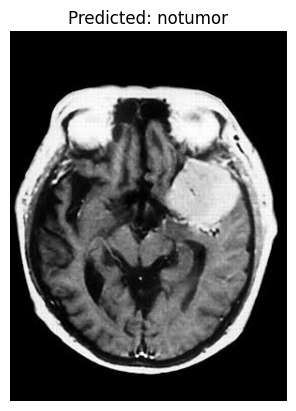

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


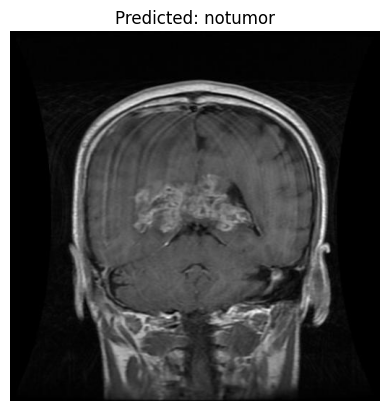

In [10]:
import random
from tensorflow.keras.preprocessing import image

# Pick random images from test set
class_labels = list(test_generator.class_indices.keys())

for i in range(5):
    img_path = random.choice(test_generator.filepaths)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()


In [16]:

# save as HDF5 (.h5)
model.save("../models/brain_tumor_cnn_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


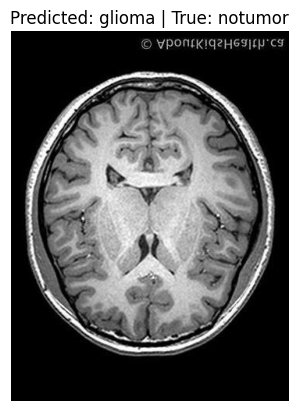

In [17]:
# Step 6: Load the model and run prediction on a sample test image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model("../models/brain_tumor_cnn_model.h5")

# Pick a random image from test set
test_dir = "../data/classification/testing"
class_names = os.listdir(test_dir)

import random
chosen_class = random.choice(class_names)
img_path = os.path.join(test_dir, chosen_class, random.choice(os.listdir(os.path.join(test_dir, chosen_class))))

# Preprocess image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Show results
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class} | True: {chosen_class}")
plt.axis("off")
plt.show()